In [1]:
import pandas as pd
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

CSV_PATH = "diabetes.csv"

In [2]:
def load_csv(csv_path : str) -> Tuple[pd.DataFrame, pd.Series]:
    df = pd.read_csv(csv_path)
    new_df = df.sample(frac=1, random_state=42)
    x, y = new_df.iloc[:, : -1], new_df.iloc[:, -1]
    return (x, y)

In [57]:
x, y = load_csv(CSV_PATH)

# ha len() nem jó akkor shape kell
def train_test_split(features : pd.core.frame.DataFrame,
                     labels : pd.core.series.Series,
                     test_split_ratio : float) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"    # False kiértékelésre AssertionErrort dob a megadott üzenettel

    x_train, y_train = features.iloc[: train_size, :], labels.iloc[: train_size]
    x_test, y_test = features.iloc[train_size :, :], labels.iloc[train_size :]
    y_train.reset_index(inplace=True, drop=True)
    y_test.reset_index(inplace=True, drop=True)
    return (x_train, y_train, x_test, y_test)

x_train, y_train, x_test, y_test = train_test_split(x, y, 0.2)


In [26]:
def euclidean(points : pd.DataFrame, element_of_x : pd.Series):
    return ((points - element_of_x) ** 2).sum(axis=1).pow(1/2)

In [64]:
def predict(x_train : pd.DataFrame, y_train : pd.Series, x_test : pd.DataFrame, k : int):
    labels_pred = []
    for i in range(len(x_test)):
        distances = euclidean(x_train, x_test.iloc[i])
        distances = pd.DataFrame(sorted(zip(distances, y_train)))
        label_pred = mode(distances.iloc[:k, 1], keepdims=False).mode
        labels_pred.append(label_pred)
    return pd.Series(labels_pred)

y_preds = predict(x_train, y_train, x_test, 1)

In [65]:
def accuracy(y_test : pd.Series, y_preds : pd.Series) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

print(accuracy(y_test, y_preds))

63.39869281045751


<class 'numpy.ndarray'>


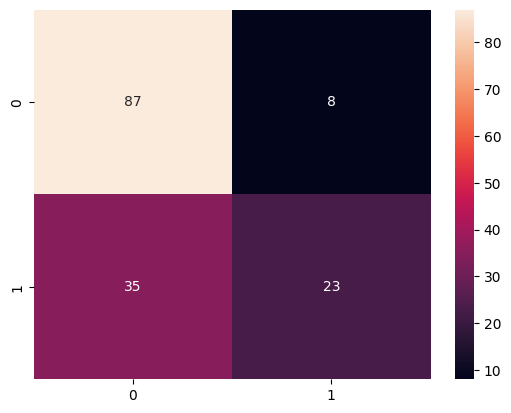

In [60]:
def plot_confusion_matrix(y_test, y_preds):
    conf_matrix = confusion_matrix(y_test, y_preds)
    print(type(conf_matrix))
    sns.heatmap(conf_matrix, annot=True)

plot_confusion_matrix(y_test, y_preds)

In [68]:
def best_k() -> Tuple[int, float]:
    accuracies = []
    for i in range(1, 21):
        y_preds = predict(x_train, y_train, x_test, i)
        accuracies.append(accuracy(y_test, y_preds))
    return (accuracies.index(max(accuracies)), max(accuracies))

best_k()

(8, 75.16339869281046)